In [1]:
! pip install openpyxl
import pandas as pd

# Load the dataset
data = pd.read_excel(r"C:\Users\jerom\Downloads\customer_seg\Online Retail.xlsx")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


EDA PROCESS

In [3]:
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [4]:
data[data['CustomerID'].isna()].head(8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [5]:
data[data['Quantity']<0].head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [8]:
data['Invoice']=data['InvoiceNo'].astype("str")
data.drop('InvoiceNo',axis=1,inplace=True)
data[data['Invoice'].str.match("^\\d{6}")==False].head(5)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice
141,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,C536379
154,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,C536383
235,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,C536391
236,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,C536391
237,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,C536391


In [9]:
# check the alphabet in invoice 
data['Invoice'].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [10]:
data[data['Invoice'].str.startswith("A")]

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice
299982,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,A563185
299983,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,A563186
299984,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,A563187


In [11]:
data['StockCode']=data['StockCode'].astype("str")
data[(data['StockCode'].str.match("^\\d{5}$")==False) &
      (data['StockCode'].str.match("^\\d{5}[a-zA-Z]+$")==False)]

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice
45,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France,536370
141,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,C536379
386,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands,536403
1123,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany,536527
1423,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.0,EIRE,536540
...,...,...,...,...,...,...,...,...
541540,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,NaN,United Kingdom,581498
541541,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,C581499
541730,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany,581570
541767,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany,581574


In [12]:
# unique item in stock code
data[(data['StockCode'].str.match("^\\d{5}$")==False) &
      (data['StockCode'].str.match("^\\d{5}[a-zA-Z]+$")==False)]['StockCode'].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

In [13]:
# check each stock code validation
data[data['StockCode'].str.contains('^DOT')]


,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice
1814,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,536544
3041,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,536592
5450,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,536862
5545,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,536864
5685,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,536865
...,...,...,...,...,...,...,...,...
536834,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,581219
537254,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,581238
539368,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,581439
540908,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,581492


DATA CLEANING


In [14]:
clean_data =data.copy()

In [15]:
clean_data['Invoice']=clean_data['Invoice'].astype('str')

mask=(
    clean_data['Invoice'].str.match("^\\d{6}$")==True
)

clean_data = clean_data[mask]
clean_data.head(3)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365


In [16]:
clean_data['StockCode']=clean_data['StockCode'].astype('str')
mask=(
    (clean_data['StockCode'].str.match("^\\d{5}$")==True) |
    (clean_data['StockCode'].str.match("^\\d{5}[a-zA-Z]+$")==True)|
    (clean_data['StockCode'].str.match("^PADS$")==True)
)

clean_data = clean_data[mask]
clean_data.head(3)


,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365


In [17]:
#  handling missing values
clean_data.isna().sum()

StockCode           0
Description      1439
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133840
Country             0
Invoice             0
dtype: int64

In [18]:
clean_data.dropna(subset=['CustomerID'],inplace=True)

In [19]:
len(clean_data[clean_data['UnitPrice']==0])

34

In [20]:
len(clean_data)/len(data)

0.7314401495454034

In [21]:
clean_data['SalesLine']=clean_data['Quantity']*clean_data['UnitPrice']
clean_data.head(2)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice,SalesLine
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365,15.30
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,20.34


In [22]:
aggregrated_data=clean_data.groupby(
    by="CustomerID", as_index=False
)\
.agg(
    MonetaryValues=("SalesLine","sum"),
    Frequency=("Invoice","nunique"),
    LastInvoice=("InvoiceDate","max")
)
aggregrated_data.head(7)

,CustomerID,MonetaryValues,Frequency,LastInvoice
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1437.24,4,2011-09-25 13:13:00
3,12349.0,1457.55,1,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00
5,12352.0,1385.74,7,2011-11-03 14:37:00
6,12353.0,89.00,1,2011-05-19 17:47:00


In [23]:
max_invoice=aggregrated_data['LastInvoice'].max()
aggregrated_data['Recency']=(max_invoice-aggregrated_data['LastInvoice']).dt.days
aggregrated_data.head(4)

,CustomerID,MonetaryValues,Frequency,LastInvoice,Recency
0,12346.0,77183.60,1,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,1
2,12348.0,1437.24,4,2011-09-25 13:13:00,74
3,12349.0,1457.55,1,2011-11-21 09:51:00,18


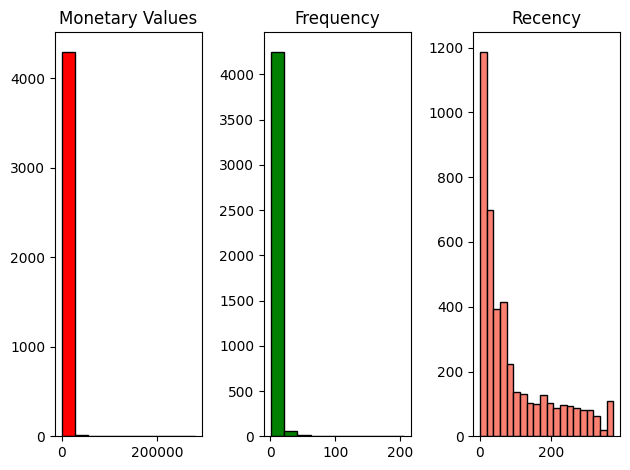

In [24]:
import matplotlib.pyplot as plt
plt.Figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregrated_data['MonetaryValues'],bins=10,color='red',edgecolor='black')
plt.title("Monetary Values")

plt.subplot(1,3,2)
plt.hist(aggregrated_data['Frequency'],bins=10,color='green',edgecolor='black')
plt.title("Frequency")

plt.subplot(1,3,3)
plt.hist(aggregrated_data['Recency'],bins=20,color='salmon',edgecolor='black')
plt.title("Recency")

plt.tight_layout()
plt.show()

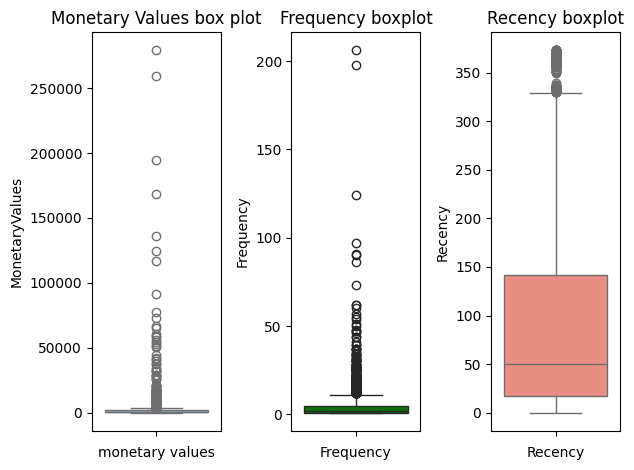

In [25]:
import seaborn as sns
plt.Figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(aggregrated_data['MonetaryValues'], color='skyblue')
plt.title("Monetary Values box plot")
plt.xlabel("monetary values")

plt.subplot(1,3,2)
sns.boxplot(aggregrated_data['Frequency'],color='green')
plt.title("Frequency boxplot")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(aggregrated_data['Recency'], color='salmon')
plt.title("Recency boxplot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

In [26]:
# outliers
Q1=aggregrated_data['MonetaryValues'].quantile(0.25)
Q3=aggregrated_data['MonetaryValues'].quantile(0.75)
IQR=Q3-Q1
monetary_outlier=(
    (aggregrated_data['MonetaryValues']<(Q1-1.5*IQR))|
    (aggregrated_data['MonetaryValues']>(Q3+1.5*IQR))
)
aggregrated_data[monetary_outlier].describe()


,CustomerID,MonetaryValues,Frequency,LastInvoice,Recency
count,425.000000,425.000000,425.000000,425,425.000000
mean,15033.644706,12568.004141,16.649412,2011-11-14 08:29:09.741176576,24.724706
min,12346.000000,3622.680000,1.000000,2010-12-02 15:27:00,0.000000
25%,13324.000000,4359.320000,8.000000,2011-11-15 14:22:00,3.000000
50%,15005.000000,5891.610000,12.000000,2011-11-29 12:09:00,10.000000
75%,16655.000000,9430.520000,19.000000,2011-12-06 12:09:00,23.000000
max,18251.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1797.854931,26097.899415,19.073886,NaN,47.076383


In [27]:
# outlier in frequency
Q1=aggregrated_data['Frequency'].quantile(0.25)
Q3=aggregrated_data['Frequency'].quantile(0.75)
IQR=Q3-Q1
frequency_outlier=(
    (aggregrated_data['Frequency']<(Q1-1.5*IQR))|
    (aggregrated_data['Frequency']>(Q3+1.5*IQR))
)
aggregrated_data[frequency_outlier].describe()

,CustomerID,MonetaryValues,Frequency,LastInvoice,Recency
count,278.000000,278.000000,278.000000,278,278.000000
mean,15355.669065,14488.006691,23.093525,2011-11-25 21:49:19.640287744,13.165468
min,12395.000000,1296.440000,12.000000,2010-12-02 15:27:00,0.000000
25%,13880.250000,4197.772500,13.000000,2011-11-23 20:17:15,2.000000
50%,15290.500000,6283.525000,17.000000,2011-12-03 13:42:00,5.500000
75%,16781.250000,11040.835000,25.000000,2011-12-07 12:15:30,15.000000
max,18283.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1745.001840,30142.778160,21.175012,NaN,30.366616


In [28]:
# non outlier data
non_outlier_data=aggregrated_data[(~monetary_outlier) & (~frequency_outlier)]
non_outlier_data.describe()

,CustomerID,MonetaryValues,Frequency,LastInvoice,Recency
count,3864.000000,3864.000000,3864.000000,3864,3864.000000
mean,15323.317547,853.593451,2.754917,2011-08-31 02:14:20.978260992,99.921325
min,12348.000000,0.000000,1.000000,2010-12-01 09:53:00,0.000000
25%,13849.750000,278.175000,1.000000,2011-07-01 15:28:00,21.000000
50%,15332.500000,570.295000,2.000000,2011-10-11 14:37:30,58.000000
75%,16797.000000,1186.677500,4.000000,2011-11-17 13:50:00,160.000000
max,18287.000000,3619.170000,11.000000,2011-12-09 12:50:00,373.000000
std,1709.834031,794.623967,2.168235,NaN,101.863105


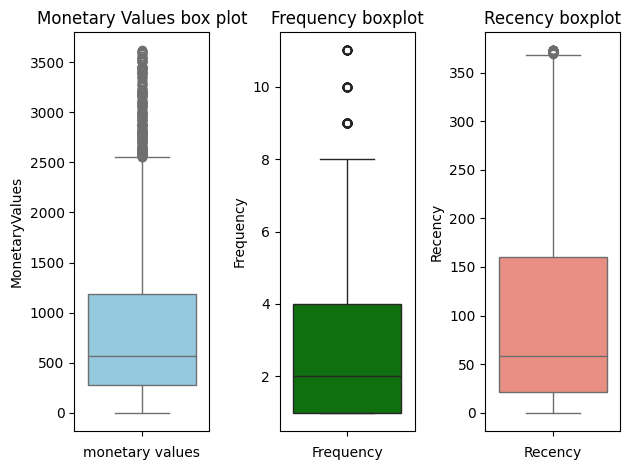

In [29]:
# visualize the non outlier data
plt.Figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(non_outlier_data['MonetaryValues'], color='skyblue')
plt.title("Monetary Values box plot")
plt.xlabel("monetary values")

plt.subplot(1,3,2)
sns.boxplot(non_outlier_data['Frequency'],color='green')
plt.title("Frequency boxplot")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(non_outlier_data['Recency'], color='salmon')
plt.title("Recency boxplot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

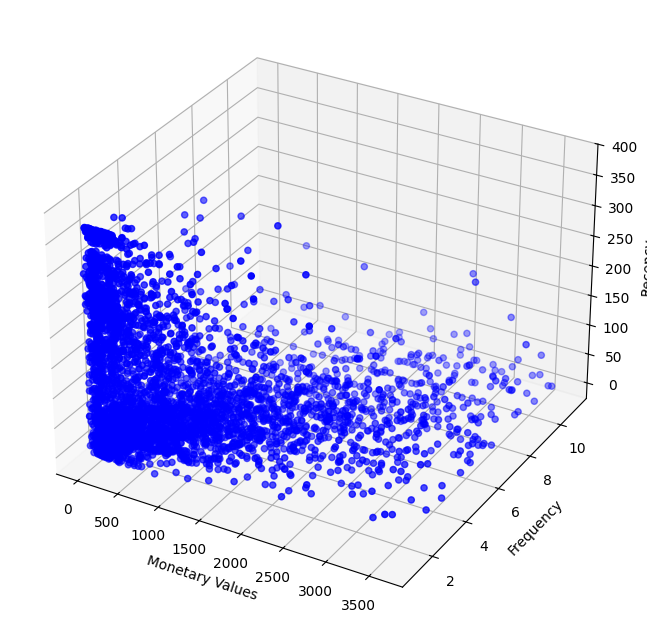

In [30]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(non_outlier_data['MonetaryValues'],
           non_outlier_data['Frequency'],
           non_outlier_data['Recency'],
           c='blue')
ax.set_xlabel("Monetary Values")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
plt.show()